In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df= pd.read_csv("Medical_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
df.shape     #dataset contains 1338 datapoints with 6 independent features and 1 dependent/target feature

(2772, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()           #dataset contains 2columns with float values,2columns with integer values and 3 columns with categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df.describe()           #descriptive analysis of the dataset

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()     #no null values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19300\970331768.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

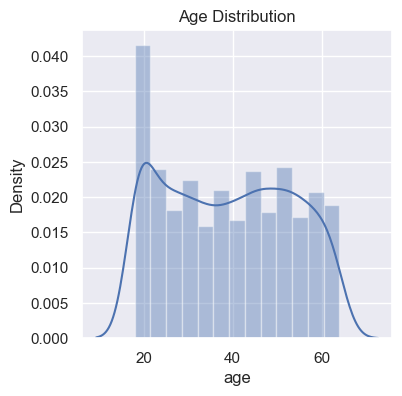

In [9]:
#distribution of age values
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show

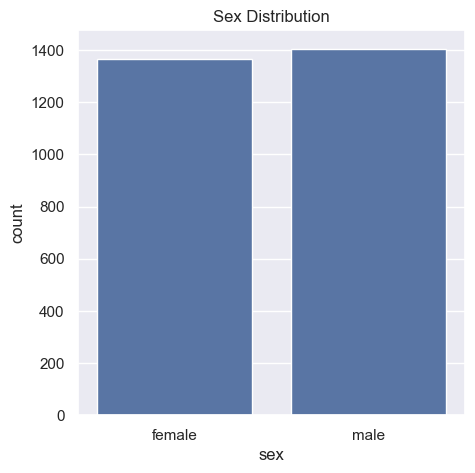

In [10]:
#for sex column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data= df)
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()    #gives the count of number of males and females

sex
male      1406
female    1366
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19300\2174357568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


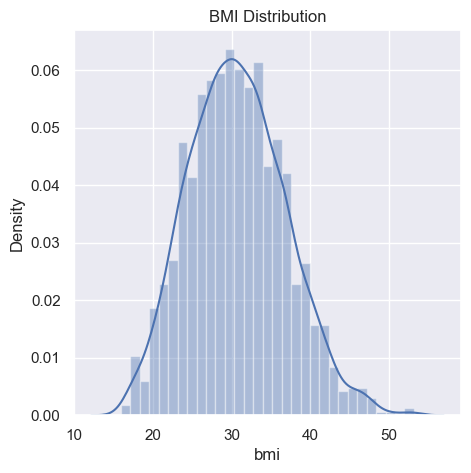

In [12]:
#for BMI column
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range = 18.5 to 24.9.
Hence, a lot of people in our data are overweight

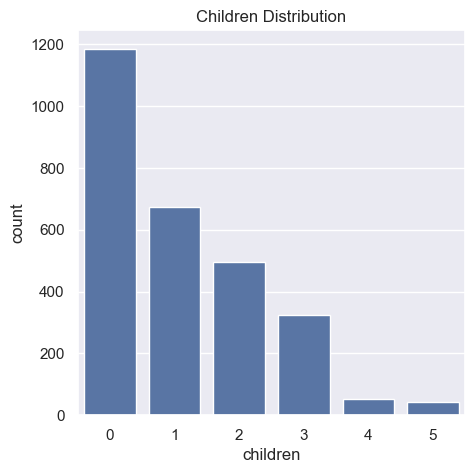

In [13]:
#Children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()                                 #using countplots since the children column takes only very few values

In [14]:
df['children'].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

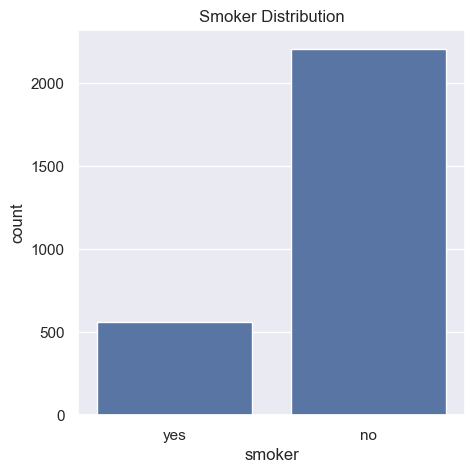

In [15]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data= df)
plt.title('Smoker Distribution')
plt.show()     

In [16]:
df['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

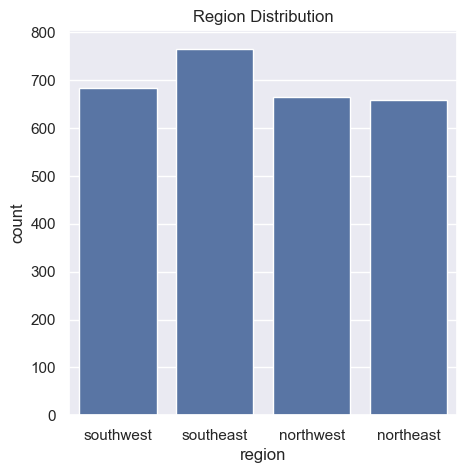

In [17]:
#region column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data= df)
plt.title('Region Distribution')
plt.show()     

In [18]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19300\1278674707.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<function matplotlib.pyplot.show(close=None, block=None)>

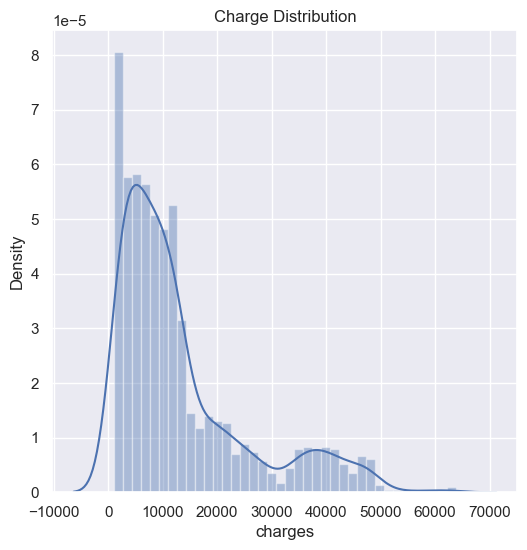

In [19]:
#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

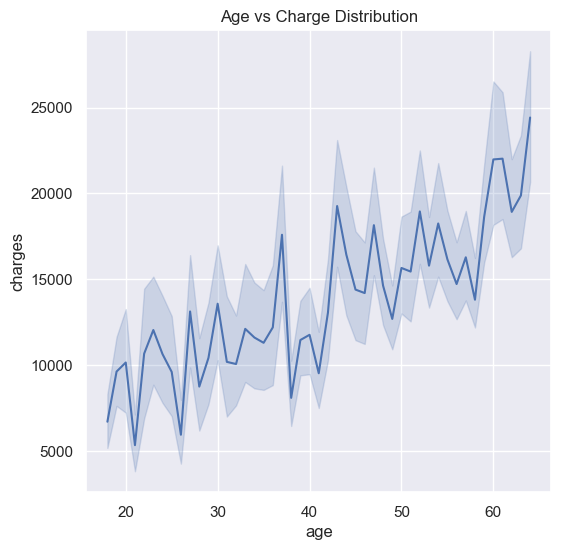

In [20]:
#Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='charges',data= df)
plt.title('Age vs Charge Distribution')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

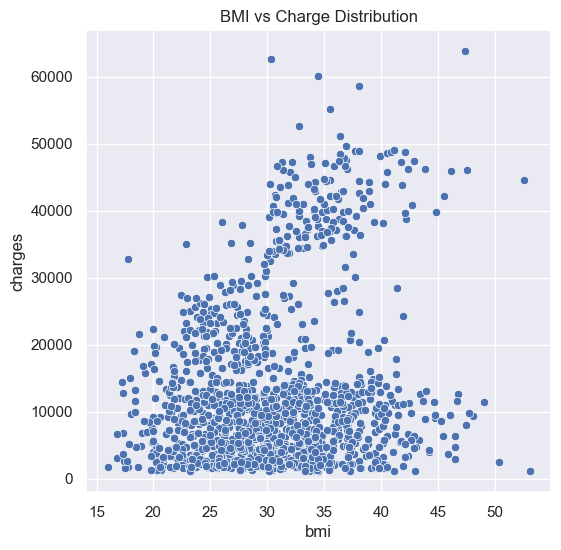

In [21]:
#Scatterplot for BMI and Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='charges',data= df)
plt.title('BMI vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

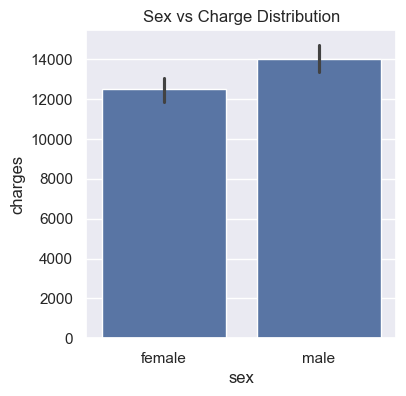

In [22]:
#Scatterplot for Sex and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',data= df)
plt.title('Sex vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

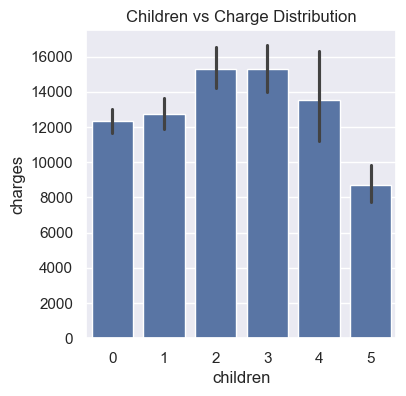

In [23]:
#Scatterplot for Children and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='charges',data= df)
plt.title('Children vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

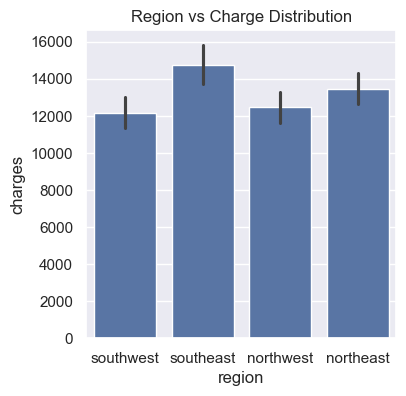

In [24]:
#Scatterplot for Region and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='charges',data= df)
plt.title('Region vs Charge Distribution')
plt.show

Encoding the categorical features i.e., sex, smoker, region

In [25]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}},inplace= True)
#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}},inplace= True)
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace= True)

In [26]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,1,0,8569.86180
2768,21,1,34.600,0,1,1,2020.17700
2769,19,0,26.030,1,0,3,16450.89470
2770,23,0,18.715,0,1,3,21595.38229


Splitting the features and the target

In [27]:
X= df.drop(columns= 'charges',axis= 1)
y= df['charges']

In [28]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [29]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size =0.8,test_size=0.2, random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(2772, 6) (2217, 6) (555, 6)


In [32]:
#loading the linear regression model
lr = LinearRegression()          #model training
svm= SVR()
rf= RandomForestRegressor()

In [33]:
lr.fit(X_train, y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor()

MODEL EVALUATION

In [34]:
#prediction on training data
training_data_pred1= lr.predict(X_train)
training_data_pred2= svm.predict(X_train)
training_data_pred3= rf.predict(X_train)

In [35]:
#R squared value
r2_train1= metrics.r2_score(y_train,training_data_pred1)
r2_train2= metrics.r2_score(y_train,training_data_pred2)
r2_train3= metrics.r2_score(y_train,training_data_pred3)
print('The R squared value for the training dataset under linear regression is: ',r2_train1)
print('The R squared value for the training dataset under support vector machine is: ',r2_train2)
print('The R squared value for the training dataset under random forest regressor is: ',r2_train3)


The R squared value for the training dataset under linear regression is:  0.7561940076387632
The R squared value for the training dataset under support vector machine is:  -0.1022583759450213
The R squared value for the training dataset under random forest regressor is:  0.9924976567243714


In [36]:
#prediction on test data
test_data_pred1= lr.predict(X_test)
test_data_pred2= svm.predict(X_test)
test_data_pred3= rf.predict(X_test)

In [37]:
#R squared value
r2_test1= metrics.r2_score(y_test,test_data_pred1)
print('The R squared value for the testing dataset is: ',r2_test1)
r2_test2= metrics.r2_score(y_test,test_data_pred2)
print('The R squared value for the testing dataset is: ',r2_test2)
r2_test3= metrics.r2_score(y_test,test_data_pred3)
print('The R squared value for the testing dataset is: ',r2_test3)

The R squared value for the testing dataset is:  0.7272408044903713
The R squared value for the testing dataset is:  -0.11619003127040228
The R squared value for the testing dataset is:  0.9373830412691533


BUILDING A PREDICTIVE SYSTEM

In [38]:
input_data= (31,1,25.74,0,1,0)
#changing input_data to numpy array
input_data_as_numpy_array= np.asarray(input_data)
#reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)       #reshape(1,-1) since we are predicting on the basis of a single sample or row
prediction1= lr.predict(input_data_reshaped)
print('The insurance cost is USD ',prediction1[0])
prediction2= svm.predict(input_data_reshaped)
print('The insurance cost is USD ',prediction2[0])
prediction3= rf.predict(input_data_reshaped)
print('The insurance cost is USD ',prediction3[0])

The insurance cost is USD  3466.4300947486045
The insurance cost is USD  9043.730277351724
The insurance cost is USD  3754.861343000007


c:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
